이 노트북의 코드에 대한 설명은 [반복 교차 검증](https://tensorflow.blog/2017/12/27/%EB%B0%98%EB%B3%B5-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D/) 글을 참고하세요.

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy

CPython 3.7.3
IPython 7.14.0

sklearn 0.23.1
numpy 1.18.4
scipy 1.4.1


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
logreg = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000)

RepeatedKFold

In [5]:
kfold = KFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
scores, scores.mean()

(array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333]),
 0.7533333333333333)

In [6]:
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rkfold)
scores, scores.mean()

(array([1.        , 0.93333333, 0.93333333, 0.96666667, 0.96666667,
        0.96666667, 0.93333333, 1.        , 1.        , 0.83333333,
        0.93333333, 0.9       , 0.96666667, 0.9       , 0.93333333,
        0.96666667, 1.        , 0.93333333, 0.93333333, 0.93333333,
        0.96666667, 0.9       , 1.        , 0.93333333, 0.93333333]),
 0.9466666666666668)

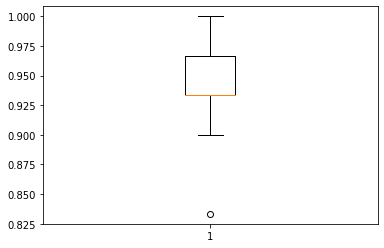

In [7]:
plt.boxplot(scores)
plt.show()

RepeatedStratifiedKFold

In [8]:
skfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=skfold)
scores, scores.mean()

(array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 0.9600000000000002)

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
scores, scores.mean()

(array([0.96666667, 1.        , 0.9       , 0.93333333, 1.        ,
        0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
        0.93333333, 1.        , 1.        , 0.93333333, 0.96666667,
        0.96666667, 1.        , 0.96666667, 0.9       , 0.96666667,
        0.96666667, 0.9       , 0.96666667, 1.        , 0.96666667]),
 0.9613333333333334)

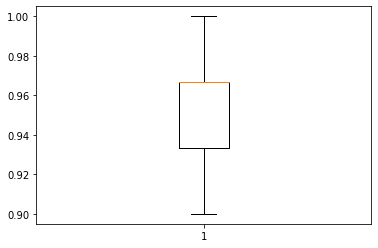

In [10]:
plt.boxplot(scores)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(logreg, param_grid, cv=rskfold, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=42),
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [12]:
grid_search.score(X_test, y_test), grid_search.best_params_, grid_search.best_score_

(1.0, {'C': 10}, 0.9640316205533597)

In [13]:
for k in grid_search.cv_results_:
    if 'split' in k:
        print(k, grid_search.cv_results_[k])

split0_test_score [0.34782609 0.65217391 0.86956522 0.95652174 1.         1.
 0.95652174]
split1_test_score [0.34782609 0.65217391 0.82608696 0.95652174 0.95652174 0.95652174
 0.95652174]
split2_test_score [0.36363636 0.68181818 0.86363636 0.90909091 0.90909091 0.86363636
 0.86363636]
split3_test_score [0.31818182 0.63636364 0.72727273 0.90909091 0.95454545 0.95454545
 0.95454545]
split4_test_score [0.31818182 0.63636364 0.81818182 1.         1.         1.
 1.        ]
split5_test_score [0.34782609 0.65217391 0.86956522 0.95652174 0.95652174 0.95652174
 0.95652174]
split6_test_score [0.34782609 0.65217391 0.73913043 0.95652174 1.         1.
 1.        ]
split7_test_score [0.36363636 0.68181818 0.90909091 0.95454545 0.95454545 0.95454545
 0.95454545]
split8_test_score [0.31818182 0.63636364 0.81818182 0.95454545 1.         1.
 1.        ]
split9_test_score [0.31818182 0.63636364 0.68181818 0.86363636 0.90909091 0.90909091
 0.95454545]
split10_test_score [0.34782609 0.65217391 0.69565217